In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pickle as pk
import scipy.sparse as spa
import scipy.sparse.linalg as spalin
from tqdm import trange
import matplotlib.colors as mcolors
import imageio
import sys
sys.path.append("..")
sys.path.append("../dyn/")
from spatial_ultis import *
from dyn_ultis import *
from dyn_params import * 
from phase_params import *

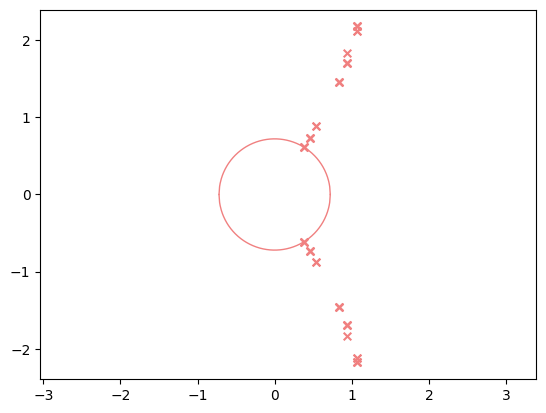

In [3]:
trial1, trial2 = 18, 10

p_simul = Simul_Params(T = 100, t_step=100, record_step=1, activation_func=['tanh','linear'])
p_net = generate_params_phase_try(trial1, trial2)
temp_plot_pred(p_net, dim=2)

In [4]:
record_x = dyn_simul(p_net, p_simul, dim=2)
#np.save(r"../../data/phase_dynrec_"+'try'+'_'+str(trial1)+'_'+str(trial2)+r'.npy',record_x)

100%|██████████| 10000/10000 [00:17<00:00, 572.28it/s]


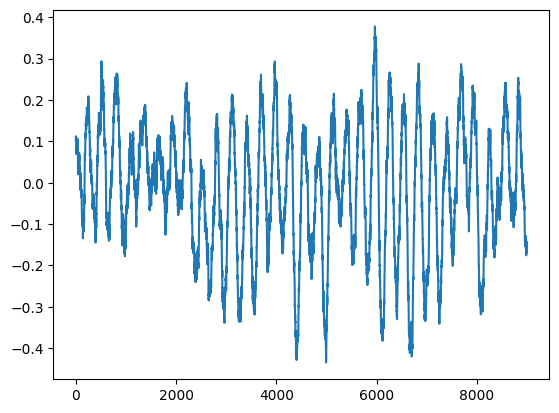

In [5]:
plt.plot(record_x[1000::,150])

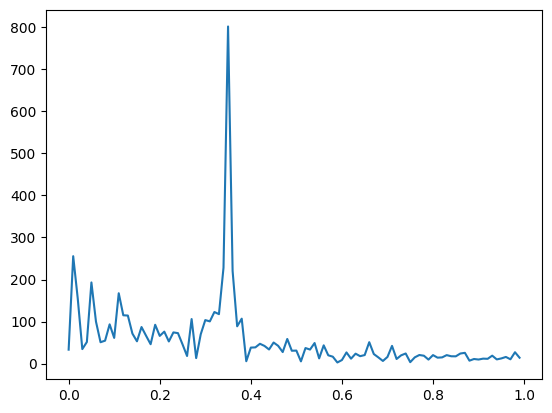

In [9]:
sp = np.abs(np.fft.fft(record_x[:,150]))
freq = np.fft.fftfreq(10000,0.01)
plt.plot(freq[0:100],sp[0:100])

(10000,)

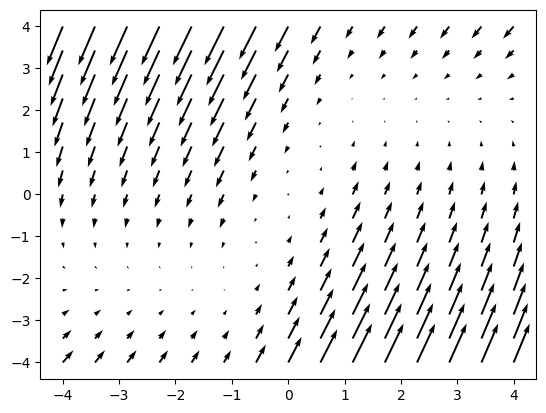

In [16]:
p_net = generate_params_phase_try(18, 10)
#现在我的目标是建一个向量场可视化
def activation_func_rectified_linear(x):
    x_min, x_max = -1, 1
    return np.maximum(x_min, np.minimum(x_max, x))

x_max, gird_num = 4, 15
x_E = np.linspace(-x_max, x_max, gird_num)
x_I = np.linspace(-x_max, x_max, gird_num)
x_E_grid, x_I_grid = np.meshgrid(x_E, x_I)

der_E = -x_E_grid + p_net.N_E/p_net.N_E * p_net.g_bar_EE * activation_func_rectified_linear(x_E_grid) + p_net.N_I/p_net.N_E * p_net.g_bar_EI * (x_I_grid)
der_I = -x_I_grid + p_net.N_I/p_net.N_I * p_net.g_bar_II * (x_I_grid) + p_net.N_E/p_net.N_I * p_net.g_bar_IE * activation_func_rectified_linear(x_E_grid)

plt.quiver(x_E, x_I, der_E, der_I)

In [24]:
a = np.sin(np.linspace(0,6*np.pi,100)).reshape((100,1))
b = np.sin(np.linspace(0,6*np.pi,100)).reshape((1,100))
c = a.dot(b)

In [25]:
d = np.fft.fft2(c)

In [30]:
sp_activated_x = np.abs(np.fft.fft2(c))
sp_activated_x = sp_activated_x[0:int(50), 0:int(50)]
max_wavenum_tuple = np.where(sp_activated_x == np.max(sp_activated_x))
max_wavenum = np.sqrt(max_wavenum_tuple[0][0]**2 + max_wavenum_tuple[1][0]**2)

In [33]:
max_wavenum_tuple

(array([3], dtype=int64), array([3], dtype=int64))

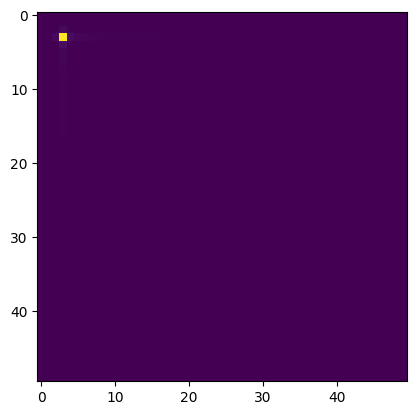

In [31]:
plt.imshow(np.abs(sp_activated_x))